
<br><br>

### Considere o dataset abaixo:

In [1]:
import pandas as pd
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head(20)

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47
5,3.0,16.986504,37.977078,4.0,34
6,5.0,6.940413,32.146399,2.0,188
7,4.0,34.361866,66.974023,7.0,35
8,4.0,9.558897,57.056682,1.0,309
9,5.0,2.799313,69.527911,7.0,327


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



CONSIDERAÇÕES - Parte 1 e 2

In [2]:
# 1 etapa) Para a resolução dos exercícios deste módulo será considerado a importação das bibliotecas necessárias para a resolução da parte 1 e 2

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


- Parte 1

In [3]:
# 1 etapa) Antes de iniciar o tratamento é interessante fazer um pré-processamento. Logo, será feita uma simples verificação da existencia de dados nulos.
df.isnull().sum()


ind_pop_cid    0
perc_pol       0
taxa_crim      0
nivel_ed       0
crimes         0
dtype: int64

In [4]:
# 2 etapa) Como o dataframe já foi carregado a partir do modelo train_test_split será feito o fatiamento dos dados em um dataset de treino (train) e outro de teste (test).
# A configuranção do fatiamento será feito como solicitado no do exercício, a partir do parâmetro test_size o tamanho será afustado para 0.25 porcento do dataset. 
# O random_state foi escolhido a utilização de um número real para testar a mesma saída nas execuções facilitando a avaliação do exercício. Contudo, na prática buscando uma divisão aleatória, seu uso pode ser dispensado casoatravés d
# O parâmetro shuffle é booleano e a escolha da opção True permite o embaralhamento do dataset antes do fatiameno. Caso não utilize o parâmetro ou em sua escolha opte por False, o dataset não será embaralhado antes da divisão.

train, test= train_test_split(df, test_size=0.25, random_state = 42, shuffle=True)


In [5]:
# 3 etapa) Escrevendo uma função para o comando train_test_split

def train_test_anydataframe (df, t_size):
    train, test = train_test_split(df, test_size = t_size, random_state = 42, shuffle=True)
    return (print('Dataframe de treino:\n', train, '\n \nDataframe de teste:\n', test))

In [6]:
# 4 etapa) Verificando a aplicabilidade da função

train_test_anydataframe(df,0.25)

Dataframe de treino:
       ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
1094          5.0  22.084306  45.985463       8.0      23
1341          5.0   8.867114  62.839458      10.0     190
1382          1.0  29.278121  90.684100      10.0     120
607           5.0  18.230819  64.906408      10.0     139
1804          3.0   0.707454  51.027935       7.0     206
...           ...        ...        ...       ...     ...
1638          4.0   3.396785  71.060426       1.0     406
1095          5.0  24.705011  38.494882       2.0      78
1130          3.0  33.063391  75.151259       5.0      46
1294          5.0  11.613053  87.277651       1.0     454
860           3.0   0.290882  25.077740       6.0      82

[1845 rows x 5 columns] 
 
Dataframe de teste:
       ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
1949          4.0   3.419839  16.552621       5.0      34
1480          4.0  28.490032  84.560216       4.0     197
1087          5.0  21.597093  25.275767       2.0      81
2

In [7]:
train

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1094,5.0,22.084306,45.985463,8.0,23
1341,5.0,8.867114,62.839458,10.0,190
1382,1.0,29.278121,90.684100,10.0,120
607,5.0,18.230819,64.906408,10.0,139
1804,3.0,0.707454,51.027935,7.0,206
...,...,...,...,...,...
1638,4.0,3.396785,71.060426,1.0,406
1095,5.0,24.705011,38.494882,2.0,78
1130,3.0,33.063391,75.151259,5.0,46
1294,5.0,11.613053,87.277651,1.0,454


In [8]:
test

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1949,4.0,3.419839,16.552621,5.0,34
1480,4.0,28.490032,84.560216,4.0,197
1087,5.0,21.597093,25.275767,2.0,81
2349,2.0,6.336720,81.641743,7.0,366
1714,2.0,0.604750,32.970095,1.0,153
...,...,...,...,...,...
1521,4.0,11.599585,53.666251,3.0,230
839,5.0,33.291000,76.644201,10.0,29
1711,1.0,26.085886,63.186422,3.0,65
511,5.0,23.781480,82.820871,1.0,255


- Parte 2.1

In [9]:
# 1 etapa) Para a escolha das variavel explicativa e seguinte aplicação no modelo de regressão linear simples será observado os valores do qui-quadrado de Pearson na váriavel resposta "crimes"
df.corr()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
ind_pop_cid,1.000000,0.016876,-0.072930,-0.000852,0.067237
perc_pol,0.016876,1.000000,0.399212,-0.055423,-0.377929
taxa_crim,-0.072930,0.399212,1.000000,0.097896,0.578659
nivel_ed,-0.000852,-0.055423,0.097896,1.000000,-0.200762
crimes,0.067237,-0.377929,0.578659,-0.200762,1.000000


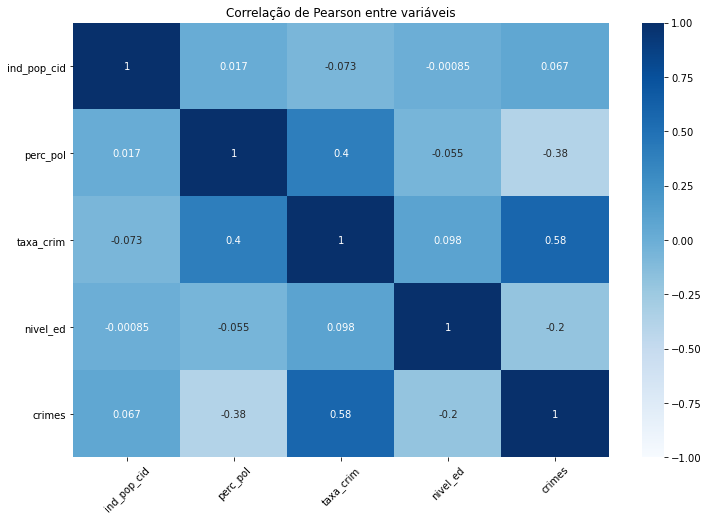

In [10]:
# 2 etapa) Melhor visualização das correlações das variáveis foi utilizado a bilioteca seaborn e matplotlib

# 2.1) Definindo tamanho da figura
rcParams['figure.figsize'] = 12, 8

# 2.2) Matriz de correlação
matriz_de_correlacao = df.corr()

# 2.3) Adicionando título ao gráfico
plt.title ('Correlação de Pearson entre variáveis')

# 2.4) Mapa de calor
sns.heatmap(matriz_de_correlacao, annot=True, vmin=-1, vmax=1, center=0, cmap = "Blues")

#2.5) Definindo a posição dos ticks nos eixos
plt.yticks(rotation=360)
plt.xticks(rotation=45)

##2.6) Mostrando a figura
plt.show() 

De acordo com os valores de chi-quadrado de Pearson, o valor que melhor represeta a relação entre as váriaveis é 0.58. Sendo assim a várial taxa de criminalidade a que melhor correlaciona com crime.

In [11]:
# 3 etapa) Como utilizaremos uma variável para criar os modelos, inicialmente será instanciado a regressão linear simples e em seguida o KNN.

In [12]:
# 3.1 etapa ) Para instanciar os modelos será elaborada uma função de cálculo da raiz do erro quadrático, RMSE (esta função de métrica, ajudará no cálculo do erro para os modelos e consequente avaliação da modelagem). 

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [13]:
# 3.2 etapa) Elaborando uma função para regressão linear

def plota_regressao_simples(X, y, Xnovo, ynovo, nome_modelo):
    
    #Definindo o modelo
    modelo = LinearRegression()
    
    # Fitando o modelo
    modelo.fit(X, y)
    
    # Fazendo a predição do dataset treino
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    # Calculando métricas de performance, através do RMSE
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    # Esboçanco o gráfico de dispersão Original
    plt.title
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'orange', s = 5)
    plt.grid()
    
    # Esboçando o gráfico de dispersão do Teste
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'dodgerblue', s = 5)
    plt.grid()
    plt.show()        

In [14]:
# Ajustando os dados para o formato adequado
X = df['taxa_crim'].values.reshape(-1,1)
type(X), X.shape

(numpy.ndarray, (2460, 1))

In [15]:
y = df['crimes'].values
type (y), y.shape

(numpy.ndarray, (2460,))

In [16]:
Xnovo = train['taxa_crim'].values.reshape(-1,1)
type(Xnovo), Xnovo.shape

(numpy.ndarray, (1845, 1))

In [17]:
ynovo = train['crimes'].values
type(ynovo), ynovo.shape

(numpy.ndarray, (1845,))

In [18]:
# Instanciando o algoritmo
lm = LinearRegression()
lm

LinearRegression()

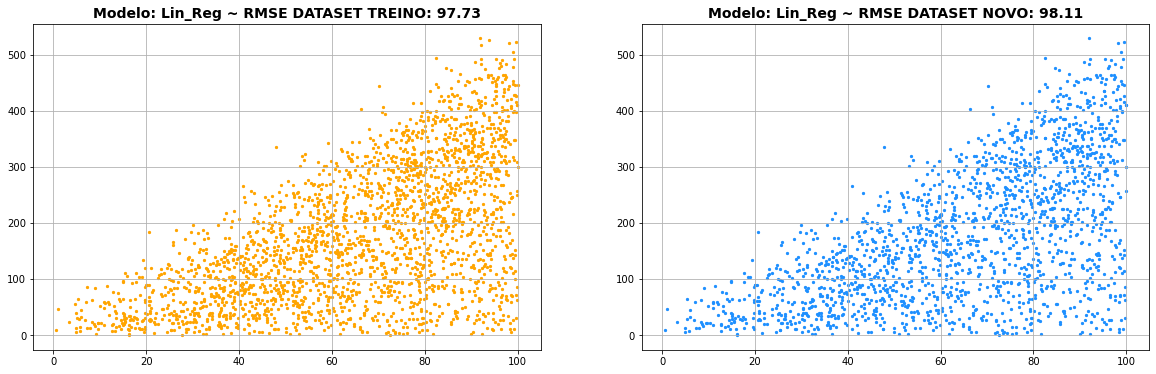

In [19]:
# Treinando o modelo
nome_modelo = 'Lin_Reg'
plota_regressao_simples(X, y, Xnovo, ynovo, nome_modelo)

In [20]:
# 3.3 etapa) Instanciando modelos de KNN (para os valores)

In [21]:
#Instanciando o algoritmo
knn = KNeighborsRegressor()

In [22]:
# Escrevendo uma função para treinar em knn
def plota_regressao_knn(X, y, Xnovo, ynovo, k, nome_modelo):
    
    #Definindo o modelo
    modelo = KNeighborsRegressor(k)
    
    # Fitando o modelo
    modelo.fit(X, y)
    
    # Fazendo a predição 
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    # Calculando métricas de performance, através do RMSE
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    # Esboçanco o gráfico de dispersão Original
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'orange', s = 5)
    plt.grid()
    
    # Esboçando o gráfico de dispersão do Teste
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'dodgerblue', s = 5)
    plt.grid()
    plt.show()

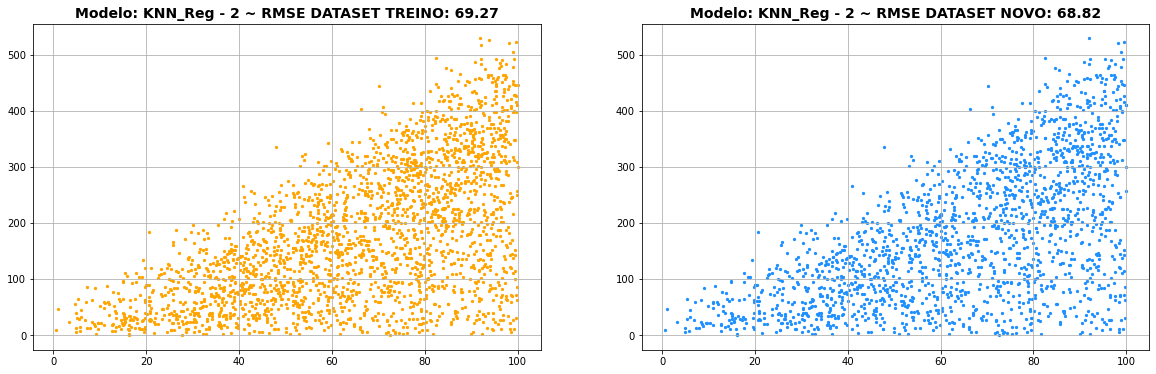

In [23]:
# Treinando o modelo em knn= 2
k = 2
nome_modelo = 'KNN_Reg - 2'
plota_regressao_knn(X, y, Xnovo, ynovo, k, nome_modelo)

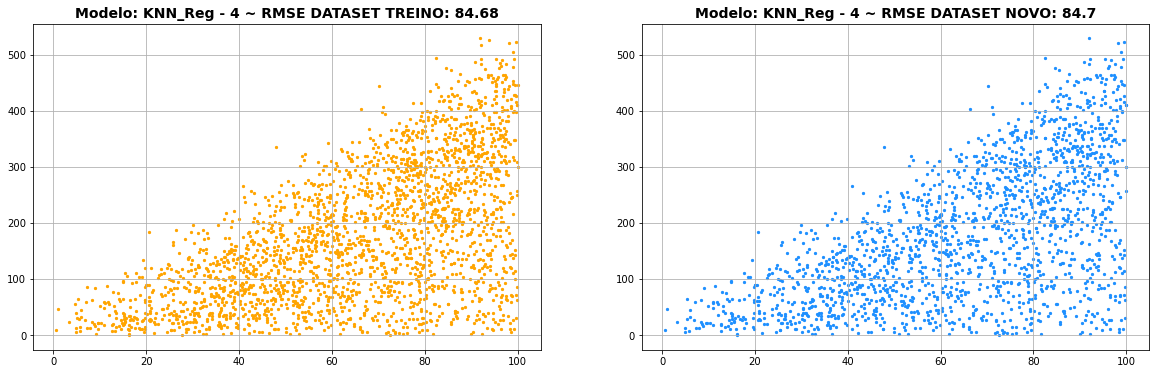

In [24]:
# Treinando o modelo em knn= 4
k = 4
nome_modelo = 'KNN_Reg - 4'
plota_regressao_knn(X, y, Xnovo, ynovo, k, nome_modelo)

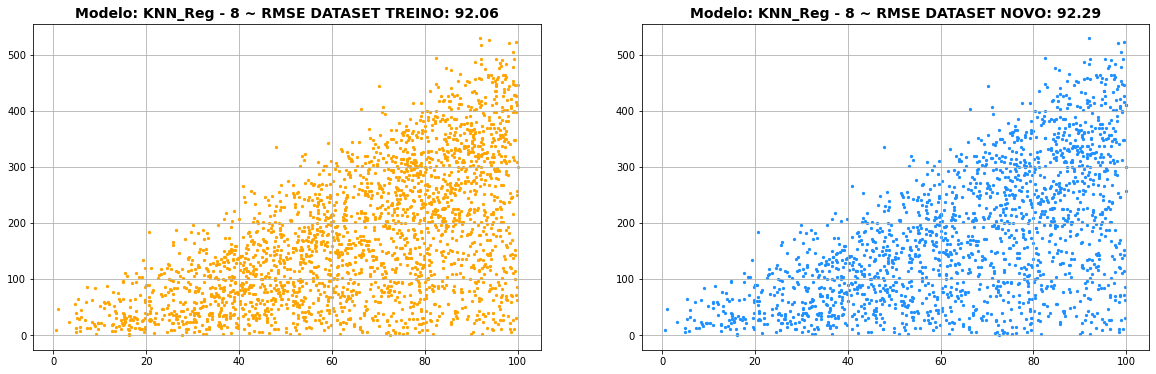

In [25]:
# Treinando o modelo em knn= 8
k = 8
nome_modelo = 'KNN_Reg - 8'
plota_regressao_knn(X, y, Xnovo, ynovo, k, nome_modelo)

In [26]:
print('O conjunto validação escolhido foi: KNN k=2')

O conjunto validação escolhido foi: KNN k=2


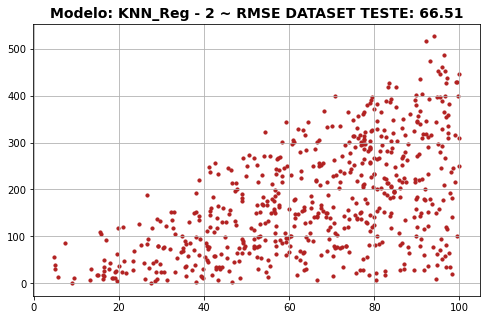

In [27]:
# 4 etapa) Verificando o dataset de teste

#Ajustando os dados
X_teste = test['taxa_crim'].values.reshape(-1,1)
y_teste = test['crimes'].values.reshape(-1,1)

#Chamando o modelo escolhido
modelo_knn = KNeighborsRegressor(2)
    
# Fitando o modelo
modelo_knn.fit(X_teste, y_teste)   

# Fazendo a predição 
predicao_dataset_teste = modelo_knn.predict(X_teste)
 
# Calculando métricas de performance, através do RMSE
rmse_dataset_teste = np.round(RMSE(y = y_teste, y_pred = predicao_dataset_teste), 2)   

    
# Esboçanco o gráfico de dispersão Original
plt.figure(figsize = [8,5])
    
plt.title("Modelo: KNN_Reg - 2 ~ RMSE DATASET TESTE: " + str(rmse_dataset_teste), fontsize = 14, fontweight = 'bold')
plt.scatter(X_teste, y_teste, c = 'firebrick', s = 10)
plt.grid() 
plt.show()

Observando o modelo de regressão linear simples e o KNN, para 2,4 e 8, respectivamente, observa-se que todos os modelos apresentam uma similaridade na visualização do gráfico de dispersão, porém avaliando a métrica RMSE o modelo que obteve o menor erro foi o KNN com k = 2. Este foi escolhido como validação para o dataset teste e a sua aplicação apresentou um RMSE DE 66.51, valor significativamente próximo ao encontrado no dataset de validação. Indicando assim a capacidade de generalização do modelo. Os demais modelos não performaram similarmente e sofreram overfitting. A saber são: Regressão Simples; KNN k= 4 e KNN k=8.

- Parte 2.2

In [28]:
# 1 etapa) Instanciando os modelos de regressão e knn para todas as demais variáveis juntas:

In [29]:
# Declarando um array com as variáveis preditoras e ajustado o formato dos dados
Xgeral = df[['ind_pop_cid','perc_pol', 'nivel_ed']].values
type(Xgeral), Xgeral.shape

(numpy.ndarray, (2460, 3))

In [30]:
ygeral = df[['crimes']].values
type(ygeral), ygeral.shape

(numpy.ndarray, (2460, 1))

In [31]:
# Fitando para o modelo de regressão linear
lm.fit(Xgeral, ygeral)

LinearRegression()

In [32]:
#Fazendo a predição do dataset treino
predicaolm_geral = lm.predict(Xgeral)

In [33]:
RMSE_lm_geral= round(RMSE(ygeral, predicaolm_geral), 2)
print (f'Para o Modelo de regressão linear o RMSE é {RMSE_lm_geral}.')

Para o Modelo de regressão linear o RMSE é 107.34.


In [34]:
# Instanciando para o modelo de knn=2
knn_2geral = KNeighborsRegressor(2)

In [35]:
# Fitando para o modelo de regressão linear
knn_2geral.fit(Xgeral, ygeral)

KNeighborsRegressor(n_neighbors=2)

In [36]:
# Fazendo a predição no dataset de treino - modelo knn
predicaoknn2_geral = knn_2geral.predict(Xgeral)

In [37]:
RMSE_knn2_geral= round(RMSE(ygeral, predicaoknn2_geral), 2)
print(f'Para o Modelo de regressão knn, com número de vizinhos 2, o RMSE é {RMSE_knn2_geral}.')

Para o Modelo de regressão knn, com número de vizinhos 2, o RMSE é 74.06.


In [38]:
# Instanciando para o modelo de knn=4
knn_4geral = KNeighborsRegressor(4)

In [39]:
# Fitando para o modelo de regressão linear
knn_4geral.fit(Xgeral, ygeral)

KNeighborsRegressor(n_neighbors=4)

In [40]:
# Fazendo a predição no dataset de treino - modelo knn
predicaoknn4_geral = knn_4geral.predict(Xgeral)

In [41]:
RMSE_knn4_geral= round(RMSE(ygeral, predicaoknn4_geral), 2)
print(f'Para o Modelo de regressão knn, com número de vizinhos 4, o RMSE é {RMSE_knn4_geral}.')

Para o Modelo de regressão knn, com número de vizinhos 4, o RMSE é 92.21.


In [42]:
# Instanciando para o modelo de knn=8
knn_8geral = KNeighborsRegressor(8)

In [43]:
# Fitando para o modelo de regressão linear
knn_8geral.fit(Xgeral, ygeral)

KNeighborsRegressor(n_neighbors=8)

In [44]:
# Fazendo a predição no dataset de treino - modelo knn
predicaoknn8_geral = knn_8geral.predict(Xgeral)

In [45]:
RMSE_knn8_geral= round(RMSE(ygeral, predicaoknn8_geral), 2)
print(f'Para o Modelo de regressão knn, com número de vizinhos 8, o RMSE é {RMSE_knn8_geral}.')

Para o Modelo de regressão knn, com número de vizinhos 8, o RMSE é 100.59.


Após instanciar os modelos, olhando apenas as métricas de performance observou-se que o menor valor de RMSE foi para o método de regressão knn com 2 vizinhos.A principio está parametrização performou bem, pois ao testar em um diferente cenário, com todas as variáveis preditivas (exceto crime), o modelo apresentou RMSE próximo ao do modelo de validação.